### Data Basics and Preparation

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "colab"
%matplotlib inline

df = pd.read_csv('data/opsd_germany_daily.csv', parse_dates=['Date'], index_col='Date')
df.sort_index(inplace=True)
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [4]:
!conda install -c conda-forge -y pandas

Jupyter detected...
2 channel Terms of Service accepted
doneieving notices: - 
Channels:
 - conda-forge
 - defaults
Platform: osx-64
doneecting package metadata (repodata.json): | 
doneing environment: - 


==> WARNING: A newer version of conda exists. <==
    current version: 25.7.0
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



In [16]:
print(df.info())
display(df.describe().T)
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB
None


,count,mean,std,min,25%,50%,75%,max
Consumption,4383.0,1338.675836,165.775710,842.395,1217.85900,1367.123,1457.76100,1709.568
Wind,2920.0,164.814173,143.692732,5.757,62.35325,119.098,217.90025,826.278
Solar,2188.0,89.258695,58.550099,1.968,35.17925,86.407,135.07150,241.580
Wind+Solar,2187.0,272.663481,146.319884,21.478,172.18550,240.991,338.98800,851.556


Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [17]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday'] = df.index.day_name()

print("Date range:", df.index.min(), "to", df.index.max())
print("Frequency:", pd.infer_freq(df.index))
df.head()

Date range: 2006-01-01 00:00:00 to 2017-12-31 00:00:00
Frequency: D


,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday


**Observations**
- The dataset includes daily records of electricity consumption, wind power, and solar power production for Germany.
- The date column runs from January 1, 2006 to December 31, 2017
- There are a few missing values in each column
- Added Year, Month, and Weekday columns to make it easier to analyze
- All numeric variables were converted to float64 to allow aggregation functions like .mean() and .resample() to work properly

### Data Exploration - Basic Visualization

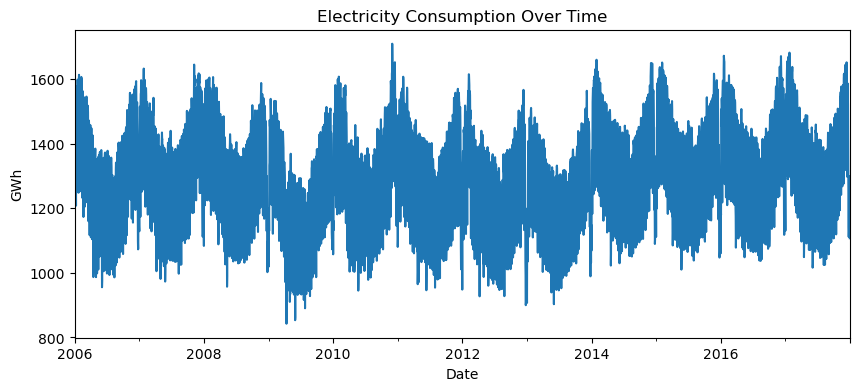

In [18]:
df['Consumption'].plot(figsize=(10,4), title='Electricity Consumption Over Time', ylabel='GWh')
plt.show()

**Observations**
- The graph shows that electricity consumption fluctuated seasonally every year.
- In winter seasons, the electricty usuage would go up.
- Lower ususage in the summer, as people do not need to use as much heating or lighting

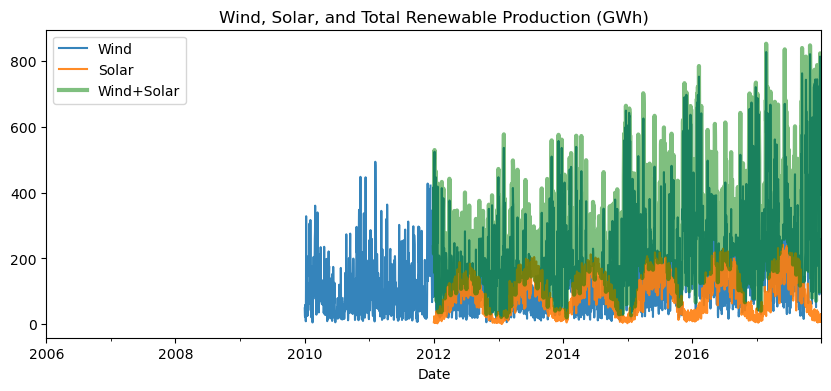

In [37]:
df[['Wind','Solar']].plot(figsize=(10,4), alpha=0.9)
df['Wind+Solar'].plot(figsize=(10,4), alpha=0.5, color='green', linewidth=3, label='Wind+Solar')
plt.title('Wind, Solar, and Total Renewable Production (GWh)')
plt.legend()
plt.show()

**Observations**
- Similar to the electricity consumption, the solar production is changing with the seasons, with more production when there is sun during the summers and less in the winters
- The wind production has gone up consistently since 2010, as we have continued to move towards more sustainable methods of energy.
- I had to make the wind + solar section transparent in order to see the other two, but that one is also consistent with the wind, proving our move towards renewable energy.

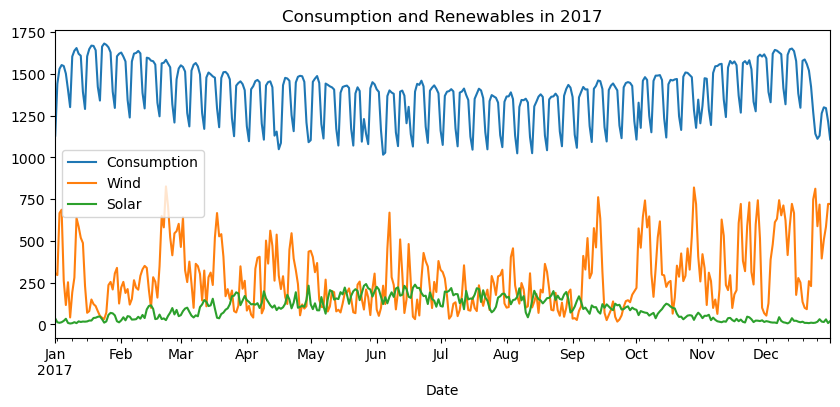

In [38]:
focal_year = df.loc['2017']
focal_year[['Consumption','Wind','Solar']].plot(figsize=(10,4),
    title='Consumption and Renewables in 2017')
plt.show()

**Observations**
- Electricity consumption remained relativley constant throughout the year 2017, besides a slight dropoff in December.
- Wind production peaked in the winter and late fall, while solar peaked in the summer.
- Wind production is still overall much higher than solar production.
- Athough there has been more renewable energy, consumption is still much higher.

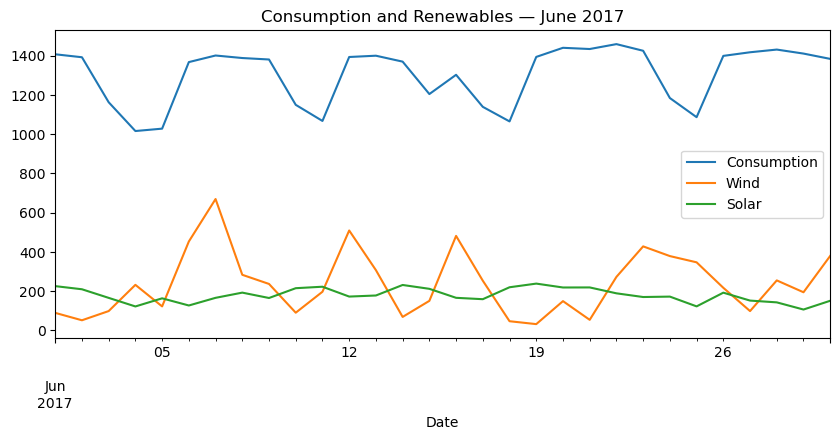

In [21]:
focal_month = df.loc['2017-06']
focal_month[['Consumption','Wind','Solar']].plot(figsize=(10,4),
    title='Consumption and Renewables — June 2017')
plt.show()

**Observations**
- This plot displays the energy of just June 2017 being similar to the plot of the entire year.
- Electricity consumption was constant, with dips on ceartin days possibly due to weather.
- Overall this has the same trends as the ones seen across the year. Consumption being constantly more than the renewable energy produced.

### Further Exploration

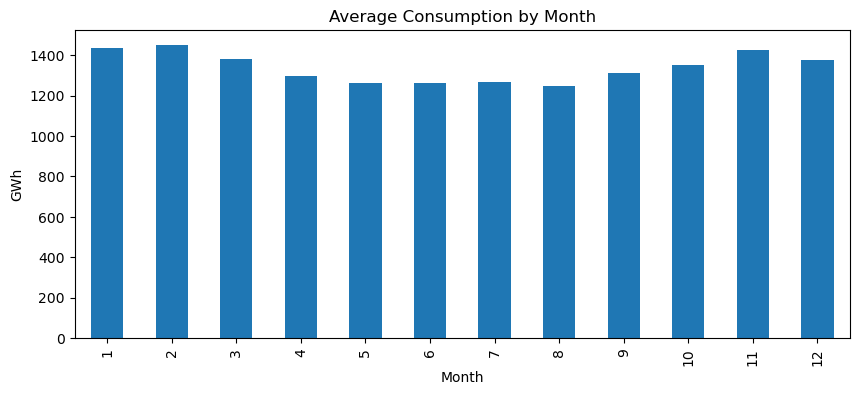

In [22]:
monthly_means = df.groupby('Month')['Consumption'].mean()
monthly_means.plot(kind='bar', figsize=(10,4), title='Average Consumption by Month', ylabel='GWh')
plt.show()

**Observation**
- The monthly averages show a seasonal trend, with the consumption being higher during the winter months.
- Consumption decreases during the summer, as less heating and lights are needed.
- The overall change is not very large, but still comfirms the relationship between temperature, daylight hours, and energy consumption.

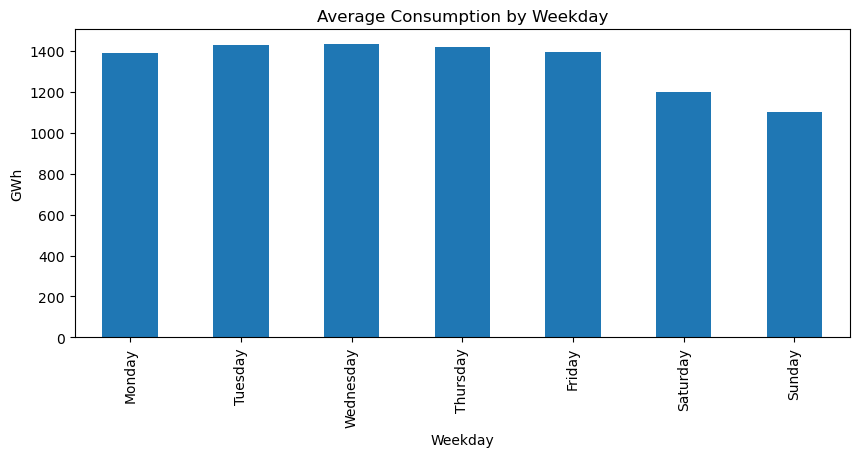

In [23]:
weekday_means = df.groupby('Weekday')['Consumption'].mean()
weekday_means = weekday_means.reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
weekday_means.plot(kind='bar', figsize=(10,4), title='Average Consumption by Weekday', ylabel='GWh')
plt.show()

**Observations**
- The weekly average displays that there is less energy usuage on the weekends.
- This could be due to people leaving their houses and going to have fun somewhere else.
- The constant energy usage during the weekdays makes sense because people are usually at work.
- These results show that weekdays demand more power due to work related activities, while weekends see lower overall demand.

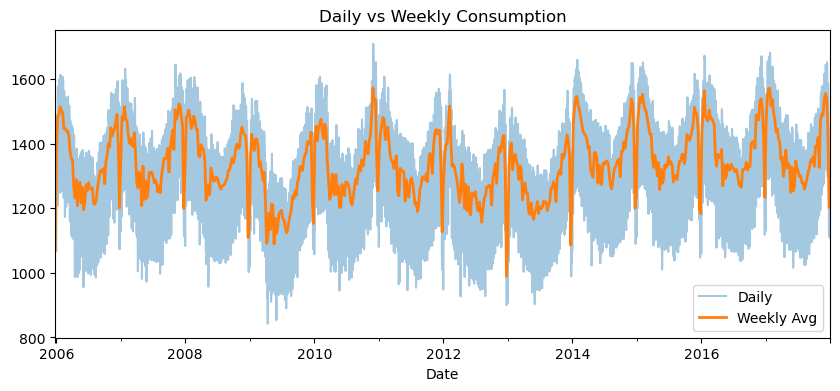

In [30]:
num_cols = df.select_dtypes(include="number").columns

weekly = df[num_cols].resample("W").mean()

ax = df["Consumption"].plot(alpha=0.4, label="Daily", figsize=(10,4))
weekly["Consumption"].plot(ax=ax, label="Weekly Avg", linewidth=2)
ax.legend(); ax.set_title("Daily vs Weekly Consumption")
plt.show()

**Observations**
- The blue line represents daily consumption, which changes rapidly due to the short term changes such as weather.
- The orange line is weekly average, which is a bit smoother, but shows a overall seasonal pattern.
- Both lines show the same pattern, electricity use peaks during winter and drops during the summer months.

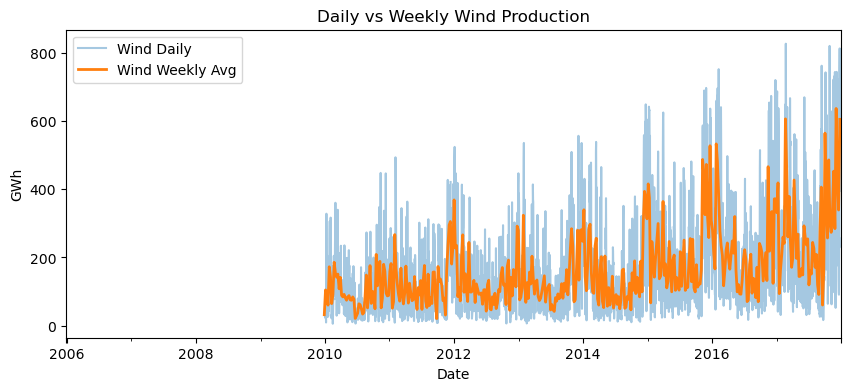

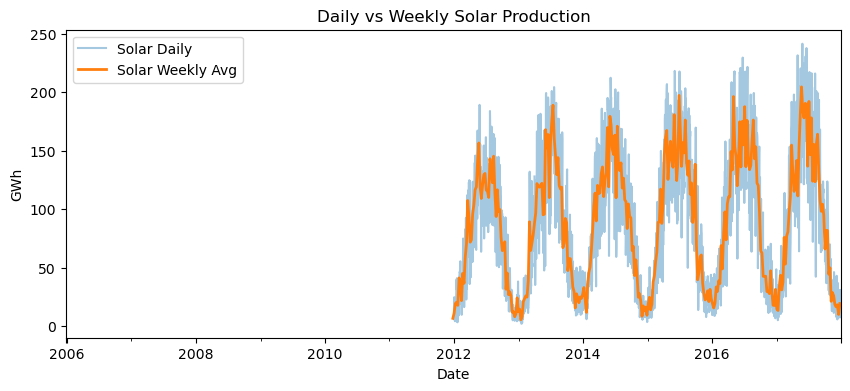

In [40]:
weekly_resampled = df[['Wind','Solar']].resample('W').mean()

ax = df['Wind'].plot(alpha=0.4, label='Wind Daily', figsize=(10,4))
weekly_resampled['Wind'].plot(ax=ax, label='Wind Weekly Avg', linewidth=2)
plt.title('Daily vs Weekly Wind Production')
plt.ylabel('GWh')
plt.legend()
plt.show()

ax = df['Solar'].plot(alpha=0.4, label='Solar Daily', figsize=(10,4))
weekly_resampled['Solar'].plot(ax=ax, label='Solar Weekly Avg', linewidth=2)
plt.title('Daily vs Weekly Solar Production')
plt.ylabel('GWh')
plt.legend()
plt.show()

**Observations**
- Wind production shows strong changes throughout the year, with noticeable peaks in the colder months, consistent with stronger wind speeds in winter.
- Solar production has a similar cycle, with increases during the summer months and drops during the winter.

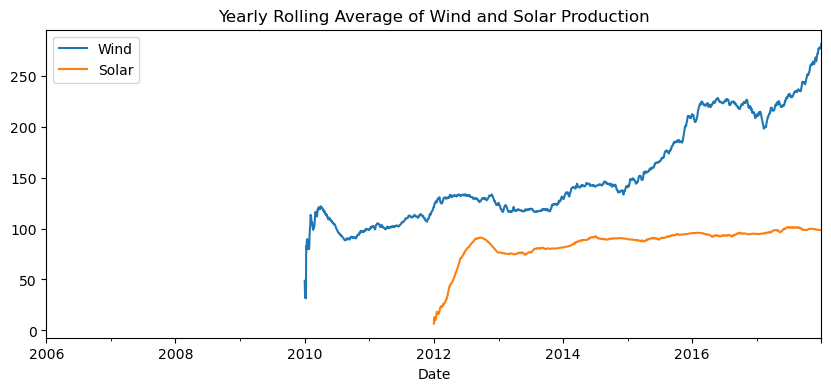

In [25]:
roll365 = df[['Wind','Solar']].rolling(365, min_periods=1).mean()
roll365.plot(figsize=(10,4), title='Yearly Rolling Average of Wind and Solar Production')
plt.show()

**Observations**
- This graph shows long term trends for wind and solar production.
- Wind production has increased steadily since 2010, with it being higher than ever right now.
- Solar production saw a peak in 2012, but has increased at a much slower rate due to less investment.
- Overall, the chart highlights the increasing reliability and contribution of renewables to the energy system over time.

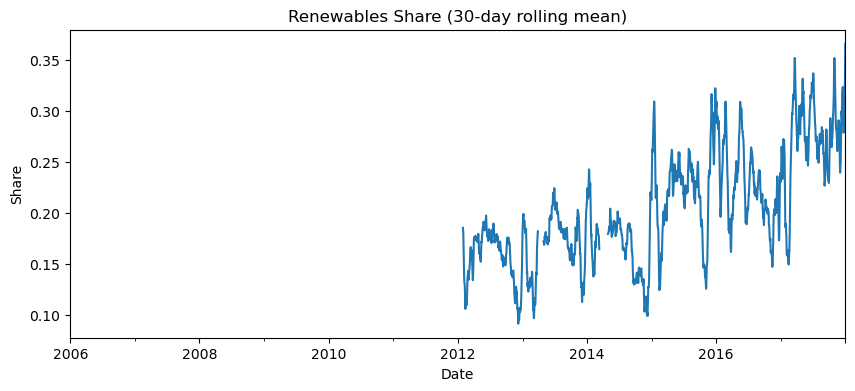

In [31]:
share = (df['Wind+Solar'] / df['Consumption']).replace([np.inf,-np.inf], np.nan).clip(0,1)
share.rolling(30).mean().plot(figsize=(10,4), title='Renewables Share (30-day rolling mean)', ylabel='Share')
plt.show()

**Oberservations**
- The line shows the fraction of total electricity consumption provided by renewable sources.
- There is a upward trend, as we are investing more and more into renewable energy.
- The spikes and dips reflect seasonal changes, as solar power raises during the summer and wind raises during the winter.

### Conclusion

Overall, the analysis shows clear evidence of seasonal and long-term trends in Germany’s electricity production and consumption.